$$\min \sum_{i,j,k}i*j*k*X_{i,j,k}$$
Each cell is assigned with only one color 
$$ \sum_{k}X_{i,j,k}=1$$ 
Each column has color k only one time 
$$ \sum_{i}X_{i,j,k}=1$$
Each row has color k only one time 
$$ \sum_{j}X_{i,j,k}=1$$





In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
cmap = plt.cm.Set1  # define the colormap
cmap = [cmap(i) for i in range(20)]

In [2]:
model = AbstractModel()
model.N =Param ( mutable=True)
model.i = RangeSet(model.N)
model.j = Set(initialize=model.i)
model.k = Set(initialize=model.i)

#model.x =Param (model.i, default=0, mutable=True) 
model.x = Var(model.i,model.j,model.k, within=Binary)
model.OF = Var(within=NonNegativeReals)
def r_c1(model,i,k):
    return sum(model.x[i,j,k] for j in model.j)==1
model.C1=Constraint(model.i,model.k, rule=r_c1)

def r_c2(model,j,k):
    return sum(model.x[i,j,k] for i in model.i)==1
model.C2=Constraint(model.j,model.k, rule=r_c2)

def r_c3(model,i,j):
    return sum(model.x[i,j,k] for k in model.k)==1
model.C3=Constraint(model.i,model.k, rule=r_c3)

def r_OF(model):
    return model.OF==sum(i*j*k*model.x[i,j,k] for i in model.i for j in model.j for k in model.k)
model.C4=Constraint( rule=r_OF)

model.obj = Objective(expr=model.OF , sense=minimize)


In [3]:
model.N=8
opt = SolverFactory('glpk')
#opt.options["mipgap"] = 0.05
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

feasible


(0.6215463577012281, 8.378453642298771, 0.6061889282485797, 8.393811071751418)

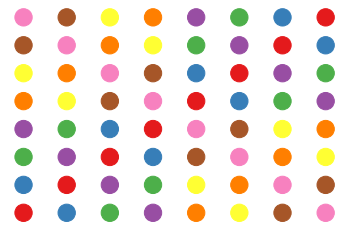

In [4]:
X=[]
Y=[]
K=[]
for i in instance.i:
    for j in instance.j:
        for k in instance.k:
            if value(instance.x[i,j,k]) >0:
                #print(i,j,k)
                X.append(i)
                Y.append(j)
                K.append(k)
Kn=[cmap[i-1] for i in K ]
plt.scatter(X,Y,s=300,c=Kn)
plt.axis('off')